In [14]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import numpy as np
import scipy as sp
from collections import deque
import time

In [15]:
player_1 = "Sophia"
player_2 = "Mateo"

PRIMERA = "Primera"
ULTIMA = "Última"

#Funcion que obtiene las monedas que debe seleccionar Sophia y mateo en orden de turno,
#para que Sophia obtenga el maximo aculumado posible
#Pre: lista con las monedas del juego
#Post: lista con las monedas de Sopia, listas con la monedas de Mateo
def greedy_strategy(coins):
    coins = deque(coins)
    sophia_coins = []
    mateo_coins = []
    while coins:
        sophia_play_taking_higher_coin(coins, sophia_coins)
        mateo_play_taking_lowest_coin(coins, mateo_coins)
    return sophia_coins, mateo_coins

def sophia_play_taking_higher_coin(coins, sophia_coins):
    if coins[0]>=coins[-1]:
        sophia_coins.append((coins.popleft(), PRIMERA))
    else:
        sophia_coins.append((coins.pop(), ULTIMA))

def mateo_play_taking_lowest_coin(coins, mateo_coins):
    if coins:
        if coins[0]>=coins[-1]:
            mateo_coins.append((coins.pop(), ULTIMA))
        else:
            mateo_coins.append((coins.popleft(), PRIMERA))

In [16]:
RUNS_PER_SIZE = 10

def _time_run(algorithm, *args):
    start = time.time()
    algorithm(*args)
    return time.time() - start

# Siempre seteamos la seed de aleatoridad para que los # resultados sean reproducibles
np.random.seed(12345)
sns.set_theme()

# Define una funcion que genera un arreglo aleatorio de numeros enteros de tamaño size
def get_random_array(size: int):
    # Retorna un arreglo de numeros enteros generados aleatoriamente en el rango [0; 100] y de tamaño size
    return np.random.randint(0, 100, size)

# La variable x van a ser los valores del eje x de los gráficos en todo el notebook
# Tamaño mínimo=100, tamaño máximo=40kk, cantidad de puntos=10
# Genera 10 valores equiespaciados entre 100 y 40,000
# Los convierte a enteros (astype(int)), creando una lista de tamaños de arreglos que se usarán en el experimento
x = np.linspace(100, 40_000, 10).astype(int)

def time_algorithm_sequential(algorithm, sizes, get_args):
    total_times = {i: 0 for i in sizes}

    for i in sizes:
        for _ in range(RUNS_PER_SIZE):
            args = get_args(i)
            total_times[i] += _time_run(algorithm, *args)

    return {s: t / RUNS_PER_SIZE for s, t in total_times.items()}

results = time_algorithm_sequential(greedy_strategy, x, lambda s: [get_random_array(s).tolist()])

GRÁFICO TIEMPO DE EJECUCIÓN

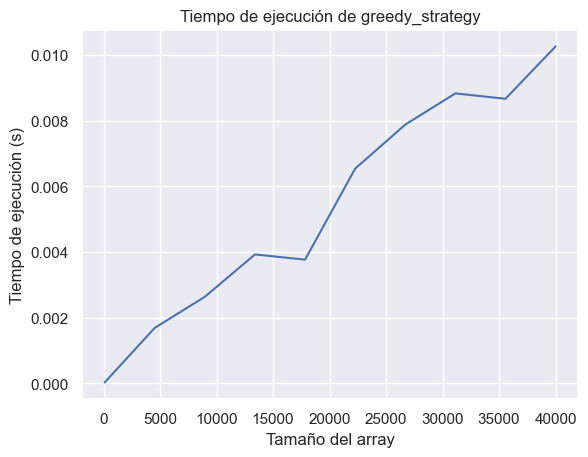

In [17]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución de greedy_strategy')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
None

GRÁFICO TIEMPO DE EJECUCIÓN CON AJUSTE

In [18]:
# scipy nos pide una función que recibe primero x y luego los parámetros a ajustar:
f = lambda x, c1, c2: c1 * x + c2 

c, pcov = sp.optimize.curve_fit(f, x, [results[n] for n in x])

print(f"c_1 = {c[0]}, c_2 = {c[1]}")
r = np.sum((c[0] * x + c[1] - [results[n] for n in x])**2)
print(f"Error cuadrático total: {r}")

c_1 = 2.551161917274669e-07, c_2 = 0.0003064279527803526
Error cuadrático total: 3.1719144950976115e-06


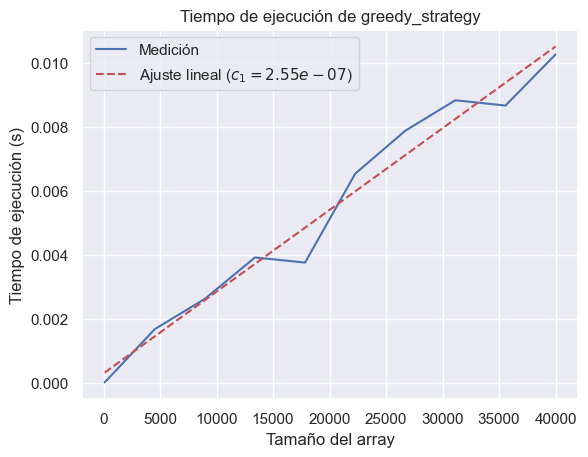

In [19]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.plot(x, [f(n, c[0], c[1]) for n in x], 'r--', label=f"Ajuste lineal ($c_1 = {c[0] :.2e}$)")
ax.set_title('Tiempo de ejecución de greedy_strategy')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
ax.legend()


GRÁFICO DEL ERROR DE AJUSTE

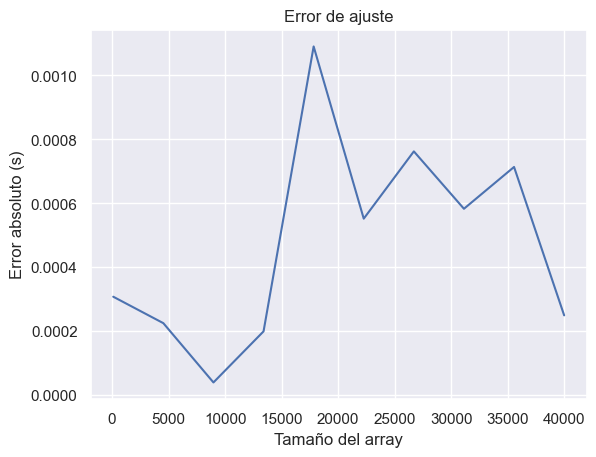

In [20]:
ax: plt.Axes
fig, ax = plt.subplots()
errors = [np.abs(c[0] * n + c[1] - results[n]) for n in x]
ax.plot(x, errors)
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
None

GRÁFICO COMPARACIÓN ENTRE VALORES PEQUEÑOS Y VALORES GRANDES

In [21]:
RUNS_PER_SIZE = 10

def _time_run(algorithm, *args):
    start = time.time()
    algorithm(*args)
    return time.time() - start

# Siempre seteamos la seed de aleatoridad para que los # resultados sean reproducibles
np.random.seed(12345)
sns.set_theme()

# Define una funcion que genera un arreglo aleatorio de numeros enteros de tamaño size
def get_random_array_little(size: int):
    # Retorna un arreglo de numeros enteros generados aleatoriamente en el rango [1; 50] y de tamaño size
    return np.random.randint(1, 50, size)

# Define una funcion que genera un arreglo aleatorio de numeros enteros de tamaño size
def get_random_array_big(size: int):
    # Retorna un arreglo de numeros enteros generados aleatoriamente en el rango [950; 1000] y de tamaño size
    return np.random.randint(950, 1000, size)

results1 = time_algorithm_sequential(greedy_strategy, x, lambda s: [get_random_array_little(s).tolist()])
results2 = time_algorithm_sequential(greedy_strategy, x, lambda s: [get_random_array_big(s).tolist()])

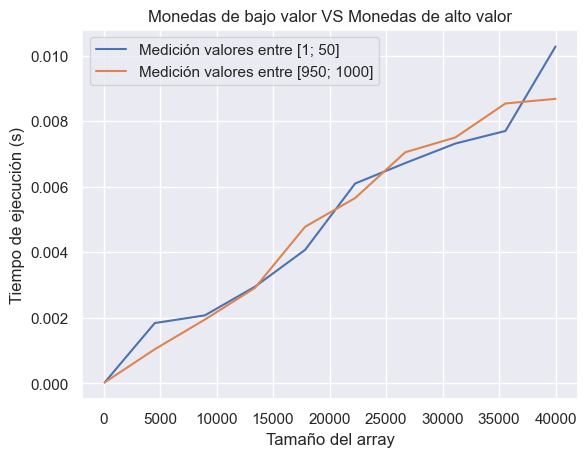

In [22]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results1[n] for n in x], label="Medición valores entre [1; 50]")
ax.plot(x, [results2[n] for n in x], label="Medición valores entre [950; 1000]")
ax.set_title('Monedas de bajo valor VS Monedas de alto valor')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')

ax.legend()
None

In [23]:
# scipy nos pide una función que recibe primero x y luego los parámetros a ajustar:
f_1 = lambda x, c1, c2: c1 * x + c2 

c_1, pcov = sp.optimize.curve_fit(f_1, x, [results1[n] for n in x])

print(f"c_1 = {c_1[0]}, c_2 = {c_1[1]}")
r = np.sum((c_1[0] * x + c_1[1] - [results1[n] for n in x])**2)
print(f"Error cuadrático total: {r}")

# scipy nos pide una función que recibe primero x y luego los parámetros a ajustar:
f_2 = lambda x, c1, c2: c1 * x + c2 

c_2, pcov = sp.optimize.curve_fit(f_2, x, [results2[n] for n in x])

print(f"c_1 = {c_2[0]}, c_2 = {c_2[1]}")
r = np.sum((c_2[0] * x + c_2[1] - [results2[n] for n in x])**2)
print(f"Error cuadrático total: {r}")

c_1 = 2.3630966683452215e-07, c_2 = 0.00016776513608363075
Error cuadrático total: 2.4192018785800735e-06
c_1 = 2.343760002743167e-07, c_2 = 0.00011188717179433372
Error cuadrático total: 1.6872660481859587e-06


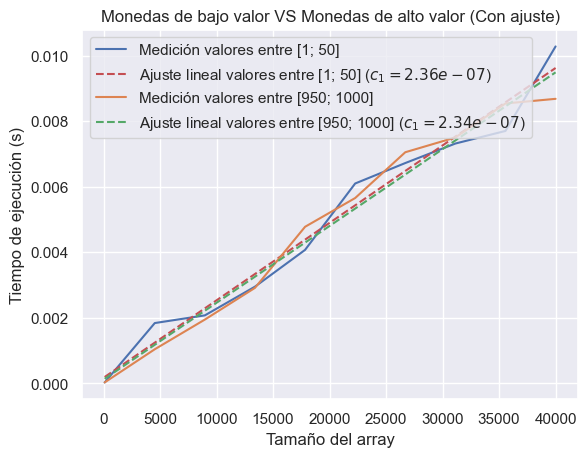

In [ ]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results1[n] for n in x], label="Medición valores entre [1; 50]")
ax.plot(x, [f_1(n, c_1[0], c_1[1]) for n in x], 'r--', label=f"Ajuste lineal valores entre [1; 50] ($c_1 = {c_1[0] :.2e}$)")
ax.plot(x, [results2[n] for n in x], label="Medición valores entre [950; 1000]")
ax.plot(x, [f_2(n, c_2[0], c_2[1]) for n in x], 'g--', label=f"Ajuste lineal valores entre [950; 1000] ($c_1 = {c_2[0] :.2e}$)")
ax.set_title('Monedas de bajo valor VS Monedas de alto valor (Con ajuste)')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
ax.legend()
None